## Script of the project

### Script No. 1 Preprocessing of data for the training

In [111]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [112]:
#read tha training data from raw folder
df = pd.read_csv("../data/raw/bookingcc.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,23208,INN23209,2,1,1,3,Meal Plan 1,0,Room_Type 1,33,2018,5,9,Online,0,0,0,143.10,0,Canceled
1,18082,INN18083,1,0,3,6,Meal Plan 1,0,Room_Type 1,2,2017,12,5,Corporate,0,0,0,91.67,0,Not_Canceled
2,7423,INN07424,2,0,1,3,Meal Plan 1,0,Room_Type 1,39,2018,10,24,Offline,0,0,0,85.00,0,Not_Canceled
3,17652,INN17653,2,0,2,2,Meal Plan 1,0,Room_Type 1,90,2018,5,7,Online,0,0,0,119.85,0,Not_Canceled
4,27339,INN27340,1,0,0,3,Meal Plan 1,0,Room_Type 1,71,2018,6,14,Offline,0,0,0,120.00,0,Not_Canceled


In [113]:
df.shape

(23216, 20)

In [114]:
# functions to treat outliers by flooring and capping
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Low_Whisker = Q1 - 1.5 * IQR
    Upp_Whisker = Q3 + 1.5 * IQR
    
    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Low_Whisker, Upp_Whisker)

def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [115]:
# Changing type of data
df['required_car_parking_space'] = df['required_car_parking_space'].astype("object") 
df['repeated_guest'] = df['repeated_guest'].astype("object")
df['arrival_year'] = df['arrival_year'].astype("object")
df['arrival_month'] = df['arrival_month'].astype("object")

#Changing by values of yes or no
index_aux=df[df['required_car_parking_space']==1].index.tolist()
df.loc[index_aux,'required_car_parking_space']='Yes'
index_aux=df[df['required_car_parking_space']==0].index.tolist()
df.loc[index_aux,'required_car_parking_space']='No'

index_aux=df[df['repeated_guest']==1].index.tolist()
df.loc[index_aux,'repeated_guest']='Yes'
index_aux=df[df['repeated_guest']==0].index.tolist()
df.loc[index_aux,'repeated_guest']='No'
    
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)
    
#Changing string values in months
years=['2017','2018']
months=['January','February','March','April','May','June','July','August','September','October','November','December']

y_num=2017
for y_text in years:
    index_aux=df[df['arrival_year']==y_num].index.tolist()
    df.loc[index_aux,'arrival_year']=y_text
    y_num=y_num+1
    
m_num=1
for m_text in months:
    index_aux=df[df['arrival_month']==m_num].index.tolist()
    df.loc[index_aux,'arrival_month']=m_text
    m_num=m_num+1    

#Treatment of very skewed data with logarithms
df["no_of_week_nights_log"] = np.log(df["no_of_week_nights"]+1)        
df["lead_time_log"] = np.log(df["lead_time"]+1)        

#Treatment of outliers
treat_outliers(df,'lead_time')
treat_outliers(df,'avg_price_per_room')    
    
# Transformation to category
df['Booking_ID'] = df['Booking_ID'].astype('category')
df['type_of_meal_plan'] = df['type_of_meal_plan'].astype('category')
df['required_car_parking_space'] = df['required_car_parking_space'].astype('category')
df['room_type_reserved'] = df['room_type_reserved'].astype('category')
df['arrival_year'] = df['arrival_year'].astype('category')
df['arrival_month'] = df['arrival_month'].astype('category')
df['market_segment_type'] = df['market_segment_type'].astype('category')
df['repeated_guest'] = df['repeated_guest'].astype('category')
df['booking_status'] = df['booking_status'].astype('int64')

In [116]:
df.drop(['Unnamed: 0','Booking_ID'],axis=1,inplace=True)

In [117]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_week_nights_log,lead_time_log
0,2,1,1,3,Meal Plan 1,No,Room_Type 1,33.0,2018,May,9,Online,No,0,0,143.10,0,1,1.386294,3.526361
1,1,0,3,6,Meal Plan 1,No,Room_Type 1,2.0,2017,December,5,Corporate,No,0,0,91.67,0,0,1.945910,1.098612
2,2,0,1,3,Meal Plan 1,No,Room_Type 1,39.0,2018,October,24,Offline,No,0,0,85.00,0,0,1.386294,3.688879
3,2,0,2,2,Meal Plan 1,No,Room_Type 1,90.0,2018,May,7,Online,No,0,0,119.85,0,0,1.098612,4.510860
4,1,0,0,3,Meal Plan 1,No,Room_Type 1,71.0,2018,June,14,Offline,No,0,0,120.00,0,0,1.386294,4.276666


In [118]:
df.shape

(23216, 20)

In [119]:
# Dummy variables
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding a contstant to X variable
X = add_constant(X)

# creating dummies
X = pd.get_dummies(X,columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

In [120]:
X.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_week_nights_log,lead_time_log,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,required_car_parking_space_Yes,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,arrival_year_2018,arrival_month_August,arrival_month_December,arrival_month_February,arrival_month_January,arrival_month_July,arrival_month_June,arrival_month_March,arrival_month_May,arrival_month_November,arrival_month_October,arrival_month_September,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_Yes
0,1.0,2,1,1,3,33.0,9,0,0,143.10,0,1.386294,3.526361,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,1.0,1,0,3,6,2.0,5,0,0,91.67,0,1.945910,1.098612,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1.0,2,0,1,3,39.0,24,0,0,85.00,0,1.386294,3.688879,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,1.0,2,0,2,2,90.0,7,0,0,119.85,0,1.098612,4.510860,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,1.0,1,0,0,3,71.0,14,0,0,120.00,0,1.386294,4.276666,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [121]:
X.shape

(23216, 40)

In [122]:
Y.shape

(23216,)

In [123]:
dfp=X.copy()
dfp['booking_status']=Y.copy()

In [124]:
dfp.to_csv("../data/processed/booking_train.csv")

### Script 2: Training of model

In [125]:
import numpy as np
import pandas as pd


# To build linear model for statistical analysis and prediction
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,    
)


import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [126]:
df=pd.read_csv("../data/processed/booking_train.csv")
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
df.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_week_nights_log,lead_time_log,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,required_car_parking_space_Yes,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,arrival_year_2018,arrival_month_August,arrival_month_December,arrival_month_February,arrival_month_January,arrival_month_July,arrival_month_June,arrival_month_March,arrival_month_May,arrival_month_November,arrival_month_October,arrival_month_September,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_Yes,booking_status
0,1.0,2,1,1,3,33.0,9,0,0,143.10,0,1.386294,3.526361,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,1.0,1,0,3,6,2.0,5,0,0,91.67,0,1.945910,1.098612,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1.0,2,0,1,3,39.0,24,0,0,85.00,0,1.386294,3.688879,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1.0,2,0,2,2,90.0,7,0,0,119.85,0,1.098612,4.510860,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1.0,1,0,0,3,71.0,14,0,0,120.00,0,1.386294,4.276666,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [127]:
df.shape

(23216, 41)

In [128]:
X_train=df.drop(labels=['booking_status'],axis=1)
y_train=df['booking_status']

In [129]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    This is for computing different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold #if is more than threshold then print
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [130]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(method='bfgs')

print("Training Performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

         Current function value: 0.411683
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
Training Performance:


,Accuracy,Recall,Precision,F1
0,0.808796,0.655798,0.73256,0.692057


In [131]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                23216
Model:                          Logit   Df Residuals:                    23176
Method:                           MLE   Df Model:                           39
Date:                Fri, 23 Dec 2022   Pseudo R-squ.:                  0.3491
Time:                        22:15:23   Log-Likelihood:                -9557.6
converged:                      False   LL-Null:                       -14684.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.1161      0.298    -10.464      0.000      -3.700      -2.532
no_of_adults                             0.0630      

**Checking Multicollinearity**

In [132]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):    
    vif_series1 = pd.Series(
        [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])],
        index=predictors.columns,
    )
    i=0
    for num in vif_series1: 
        num='{0:.4g}'.format(num)
        vif_series1[i]=num
        i=i+1
    return vif_series1[vif_series1.values<=10], vif_series1[vif_series1.values>10] 

In [133]:
vif_less10,vif_greater10 = checking_vif(X_train)
print('VIF<=10:\n\n',vif_less10,'\n')
print('VIF>10:\n\n',vif_greater10)

VIF<=10:

 no_of_adults                            1.407
no_of_children                          2.012
no_of_weekend_nights                    1.255
no_of_week_nights                       9.982
lead_time                               3.627
arrival_date                            1.014
no_of_previous_cancellations            1.376
no_of_previous_bookings_not_canceled    1.680
avg_price_per_room                      2.498
no_of_special_requests                  1.260
no_of_week_nights_log                   9.961
lead_time_log                           3.718
type_of_meal_plan_Meal Plan 2           1.278
type_of_meal_plan_Meal Plan 3           1.029
type_of_meal_plan_Not Selected          1.298
required_car_parking_space_Yes          1.046
room_type_reserved_Room_Type 2          1.090
room_type_reserved_Room_Type 3          1.002
room_type_reserved_Room_Type 4          1.388
room_type_reserved_Room_Type 5          1.032
room_type_reserved_Room_Type 6          1.976
room_type_reserved_Room

In [134]:
np.linalg.det([[3,5],[56,87]])

-19.000000000000014

* **First Let's see dropping: market_segment_type_Online**

In [135]:
X_train1 = X_train.drop("market_segment_type_Online", axis=1)
vif_less10,vif_greater10 = checking_vif(X_train1)
print('VIF<=10:\n\n',vif_less10,'\n')
print('VIF>10:\n\n',vif_greater10)

VIF<=10:

 no_of_adults                            1.396
no_of_children                          2.012
no_of_weekend_nights                    1.255
no_of_week_nights                       9.972
lead_time                               3.626
arrival_date                            1.014
no_of_previous_cancellations            1.376
no_of_previous_bookings_not_canceled    1.679
avg_price_per_room                      2.492
no_of_special_requests                  1.256
no_of_week_nights_log                   9.957
lead_time_log                           3.694
type_of_meal_plan_Meal Plan 2           1.277
type_of_meal_plan_Meal Plan 3           1.029
type_of_meal_plan_Not Selected          1.295
required_car_parking_space_Yes          1.046
room_type_reserved_Room_Type 2          1.090
room_type_reserved_Room_Type 3          1.002
room_type_reserved_Room_Type 4          1.381
room_type_reserved_Room_Type 5          1.032
room_type_reserved_Room_Type 6          1.975
room_type_reserved_Room

In [136]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(method='bfgs')

print("Training Performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

         Current function value: 0.412691
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39


* **Now Let's drop: no_of_week_nights_log**

In [137]:
X_train2 = X_train1.drop("no_of_week_nights_log", axis=1)
vif_less10,vif_greater10 = checking_vif(X_train2)
print('VIF<=10:\n\n',vif_less10,'\n')
print('VIF>10:\n\n',vif_greater10)

VIF<=10:

 no_of_adults                            1.393
no_of_children                          2.012
no_of_weekend_nights                    1.085
no_of_week_nights                       1.125
lead_time                               3.623
arrival_date                            1.014
no_of_previous_cancellations            1.376
no_of_previous_bookings_not_canceled    1.678
avg_price_per_room                      2.490
no_of_special_requests                  1.255
lead_time_log                           3.647
type_of_meal_plan_Meal Plan 2           1.276
type_of_meal_plan_Meal Plan 3           1.029
type_of_meal_plan_Not Selected          1.291
required_car_parking_space_Yes          1.046
room_type_reserved_Room_Type 2          1.090
room_type_reserved_Room_Type 3          1.002
room_type_reserved_Room_Type 4          1.381
room_type_reserved_Room_Type 5          1.032
room_type_reserved_Room_Type 6          1.975
room_type_reserved_Room_Type 7          1.091
arrival_year_2018      

In [138]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(method='bfgs')

print("Training Performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

         Current function value: 0.414447
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39


**Dropping high p-values**

In [139]:
#print(lg2.summary())

In [140]:
# running a loop to drop variables with high p-value
# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train2[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False, method='bfgs')

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols

In [141]:
print(selected_features)

['const', 'no_of_weekend_nights', 'lead_time', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'lead_time_log', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'required_car_parking_space_Yes', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'arrival_year_2018', 'arrival_month_August', 'arrival_month_December', 'arrival_month_February', 'arrival_month_January', 'arrival_month_July', 'arrival_month_May', 'arrival_month_November', 'arrival_month_September', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [142]:
X_train3 = X_train2[selected_features]

In [143]:
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(method='bfgs')

print(lg3.summary())

         Current function value: 0.413739
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                23216
Model:                          Logit   Df Residuals:                    23193
Method:                           MLE   Df Model:                           22
Date:                Fri, 23 Dec 2022   Pseudo R-squ.:                  0.3458
Time:                        22:15:57   Log-Likelihood:                -9605.4
converged:                      False   LL-Null:                       -14684.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                   

In [144]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# Dataframe: adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

,const,no_of_weekend_nights,lead_time,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,lead_time_log,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,required_car_parking_space_Yes,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,arrival_year_2018,arrival_month_August,arrival_month_December,arrival_month_February,arrival_month_January,arrival_month_July,arrival_month_May,arrival_month_November,arrival_month_September,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.029130,1.151357,1.014229,0.362601,1.016702,0.207544,1.203803,1.565345,1.226479,0.279143,0.747308,0.789182,1.966725,0.708900,0.158987,1.602802,0.282538,0.692257,0.706723,1.426352,0.720496,0.259895,0.134020
Change_odd%,-97.086969,15.135667,1.422887,-63.739899,1.670175,-79.245632,20.380338,56.534506,22.647889,-72.085694,-25.269211,-21.081822,96.672475,-29.109999,-84.101330,60.280236,-71.746223,-30.774316,-29.327683,42.635196,-27.950380,-74.010544,-86.598046


In [145]:
import pickle

filename = '../models/best_model.pkl'
pickle.dump(lg3, open(filename, 'wb'))

In [146]:
pd.Series(selected_features).to_csv("../data/processed/selected_features.csv")

### Script 3: Preparation of validation data

In [147]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [148]:
#read tha training data from raw folder
df = pd.read_csv("../data/raw/bookingcc_new.csv")

In [149]:
# functions to treat outliers by flooring and capping
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Low_Whisker = Q1 - 1.5 * IQR
    Upp_Whisker = Q3 + 1.5 * IQR
    
    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Low_Whisker, Upp_Whisker)

def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [150]:
# Changing type of data
df['required_car_parking_space'] = df['required_car_parking_space'].astype("object") 
df['repeated_guest'] = df['repeated_guest'].astype("object")
df['arrival_year'] = df['arrival_year'].astype("object")
df['arrival_month'] = df['arrival_month'].astype("object")

#Changing by values of yes or no
index_aux=df[df['required_car_parking_space']==1].index.tolist()
df.loc[index_aux,'required_car_parking_space']='Yes'
index_aux=df[df['required_car_parking_space']==0].index.tolist()
df.loc[index_aux,'required_car_parking_space']='No'

index_aux=df[df['repeated_guest']==1].index.tolist()
df.loc[index_aux,'repeated_guest']='Yes'
index_aux=df[df['repeated_guest']==0].index.tolist()
df.loc[index_aux,'repeated_guest']='No'
    
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)
    
#Changing string values in months
years=['2017','2018']
months=['January','February','March','April','May','June','July','August','September','October','November','December']

y_num=2017
for y_text in years:
    index_aux=df[df['arrival_year']==y_num].index.tolist()
    df.loc[index_aux,'arrival_year']=y_text
    y_num=y_num+1
    
m_num=1
for m_text in months:
    index_aux=df[df['arrival_month']==m_num].index.tolist()
    df.loc[index_aux,'arrival_month']=m_text
    m_num=m_num+1    

#Treatment of very skewed data with logarithms
df["no_of_week_nights_log"] = np.log(df["no_of_week_nights"]+1)        
df["lead_time_log"] = np.log(df["lead_time"]+1)        

#Treatment of outliers
treat_outliers(df,'lead_time')
treat_outliers(df,'avg_price_per_room')    
    
# Transformation to category
df['Booking_ID'] = df['Booking_ID'].astype('category')
df['type_of_meal_plan'] = df['type_of_meal_plan'].astype('category')
df['required_car_parking_space'] = df['required_car_parking_space'].astype('category')
df['room_type_reserved'] = df['room_type_reserved'].astype('category')
df['arrival_year'] = df['arrival_year'].astype('category')
df['arrival_month'] = df['arrival_month'].astype('category')
df['market_segment_type'] = df['market_segment_type'].astype('category')
df['repeated_guest'] = df['repeated_guest'].astype('category')
df['booking_status'] = df['booking_status'].astype('int64')

In [151]:
df.drop(['Unnamed: 0','Booking_ID'],axis=1,inplace=True)
#df.drop(['Booking_ID'],axis=1,inplace=True)

In [152]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_week_nights_log,lead_time_log
0,1,0,1,2,Meal Plan 1,No,Room_Type 1,118.0,2018,June,6,Online,No,0,0,20.75,0,0,1.098612,4.779123
1,2,0,1,2,Meal Plan 1,No,Room_Type 1,6.0,2017,August,14,Online,No,0,0,95.33,2,0,1.098612,1.945910
2,2,0,1,3,Meal Plan 1,No,Room_Type 1,245.0,2018,December,29,Online,No,0,0,145.80,1,0,1.386294,5.505332
3,1,0,3,6,Meal Plan 1,No,Room_Type 1,2.0,2017,December,5,Corporate,No,0,0,91.67,0,0,1.945910,1.098612
4,1,0,2,1,Not Selected,No,Room_Type 1,6.0,2018,September,25,Online,No,0,0,159.00,2,0,0.693147,1.945910


In [153]:
# Dummy variables
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding a contstant to X variable
X = add_constant(X)

# creating dummies
X = pd.get_dummies(X,columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

In [154]:
dfp=X.copy()
dfp['booking_status']=Y.copy()

In [155]:
dfp.to_csv("../data/processed/booking_val.csv")

### Script 4: Validation Code

In [156]:
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [157]:
selected_features=pd.read_csv("../data/processed/selected_features.csv")
selected_features.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
features=selected_features['0'].tolist() #list of columns that were selected in Script2: LogisticRegression

In [158]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred) #actual values , predict values
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [159]:
# Cargar la tabla transformada
df = pd.read_csv("../data/processed/booking_val.csv")
df.head()

,Unnamed: 0,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_week_nights_log,lead_time_log,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,required_car_parking_space_Yes,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,arrival_year_2018,arrival_month_August,arrival_month_December,arrival_month_February,arrival_month_January,arrival_month_July,arrival_month_June,arrival_month_March,arrival_month_May,arrival_month_November,arrival_month_October,arrival_month_September,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_Yes,booking_status
0,0,1.0,1,0,1,2,118.0,6,0,0,20.75,0,1.098612,4.779123,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,1.0,2,0,1,2,6.0,14,0,0,95.33,2,1.098612,1.945910,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,1.0,2,0,1,3,245.0,29,0,0,145.80,1,1.386294,5.505332,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,1.0,1,0,3,6,2.0,5,0,0,91.67,0,1.945910,1.098612,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,1.0,1,0,2,1,6.0,25,0,0,159.00,2,0.693147,1.945910,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [160]:
df.shape

(5804, 41)

In [161]:
X_val = df.drop(['Unnamed: 0','booking_status'],axis=1)
y_val = df['booking_status']

In [162]:
# Read the trained model
filename = '../models/best_model.pkl'
model = pickle.load(open(filename, 'rb'))

In [163]:
X_val[features].shape

(5804, 23)

In [164]:
y_val.shape

(5804,)

In [165]:
y_pred_val=model.predict(X_val[features]) 

In [166]:
optimal_threshold_curve=0.3

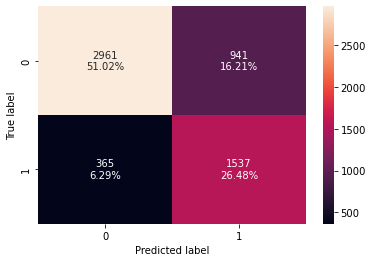

In [167]:
# creating confusion matrix
confusion_matrix_statsmodels(model, X_val[features], y_val, threshold=optimal_threshold_curve)

In [184]:
model_performance_classification_statsmodels(model, X_val[features], y_val, threshold=optimal_threshold_curve)

,Accuracy,Recall,Precision,F1
0,0.813921,0.657729,0.744643,0.698492


### Script 5: Preparation of Score Data

In [168]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [169]:
#read tha training data from raw folder
df = pd.read_csv("../data/raw/bookingcc_score.csv")

In [170]:
# functions to treat outliers by flooring and capping
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Low_Whisker = Q1 - 1.5 * IQR
    Upp_Whisker = Q3 + 1.5 * IQR
    
    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Low_Whisker, Upp_Whisker)

def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [171]:
# Changing type of data
df['required_car_parking_space'] = df['required_car_parking_space'].astype("object") 
df['repeated_guest'] = df['repeated_guest'].astype("object")
df['arrival_year'] = df['arrival_year'].astype("object")
df['arrival_month'] = df['arrival_month'].astype("object")

#Changing by values of yes or no
index_aux=df[df['required_car_parking_space']==1].index.tolist()
df.loc[index_aux,'required_car_parking_space']='Yes'
index_aux=df[df['required_car_parking_space']==0].index.tolist()
df.loc[index_aux,'required_car_parking_space']='No'

index_aux=df[df['repeated_guest']==1].index.tolist()
df.loc[index_aux,'repeated_guest']='Yes'
index_aux=df[df['repeated_guest']==0].index.tolist()
df.loc[index_aux,'repeated_guest']='No'
    
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)
    
#Changing string values in months
years=['2017','2018']
months=['January','February','March','April','May','June','July','August','September','October','November','December']

y_num=2017
for y_text in years:
    index_aux=df[df['arrival_year']==y_num].index.tolist()
    df.loc[index_aux,'arrival_year']=y_text
    y_num=y_num+1
    
m_num=1
for m_text in months:
    index_aux=df[df['arrival_month']==m_num].index.tolist()
    df.loc[index_aux,'arrival_month']=m_text
    m_num=m_num+1    

#Treatment of very skewed data with logarithms
df["no_of_week_nights_log"] = np.log(df["no_of_week_nights"]+1)        
df["lead_time_log"] = np.log(df["lead_time"]+1)        

#Treatment of outliers
treat_outliers(df,'lead_time')
treat_outliers(df,'avg_price_per_room')    
    
# Transformation to category
df['Booking_ID'] = df['Booking_ID'].astype('category')
df['type_of_meal_plan'] = df['type_of_meal_plan'].astype('category')
df['required_car_parking_space'] = df['required_car_parking_space'].astype('category')
df['room_type_reserved'] = df['room_type_reserved'].astype('category')
df['arrival_year'] = df['arrival_year'].astype('category')
df['arrival_month'] = df['arrival_month'].astype('category')
df['market_segment_type'] = df['market_segment_type'].astype('category')
df['repeated_guest'] = df['repeated_guest'].astype('category')
df['booking_status'] = df['booking_status'].astype('int64')

In [172]:
df.drop(['Unnamed: 0','Booking_ID'],axis=1,inplace=True)
#df.drop(['Booking_ID'],axis=1,inplace=True)

In [173]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_week_nights_log,lead_time_log
0,3,0,1,2,Meal Plan 1,No,Room_Type 1,165.0,2018,August,12,Online,No,0,0,146.70,0,1,1.098612,5.111988
1,2,0,0,1,Meal Plan 1,No,Room_Type 1,4.0,2018,September,15,Online,No,0,0,169.00,0,1,0.693147,1.609438
2,2,0,0,2,Meal Plan 1,No,Room_Type 1,59.0,2018,June,22,Online,No,0,0,99.90,2,0,1.098612,4.094345
3,1,0,0,3,Meal Plan 1,No,Room_Type 4,28.0,2018,June,14,Online,No,0,0,108.42,1,0,1.386294,3.367296
4,1,0,0,2,Meal Plan 2,No,Room_Type 1,74.0,2017,September,18,Offline,No,0,0,87.00,0,0,1.098612,4.317488


In [174]:
# Dummy variables
X = df.drop(["booking_status"], axis=1)

# adding a contstant to X variable
X = add_constant(X)

# creating dummies
X = pd.get_dummies(X,columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

In [175]:
dfp=X.copy()
dfp.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_week_nights_log,lead_time_log,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,required_car_parking_space_Yes,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,arrival_year_2018,arrival_month_August,arrival_month_December,arrival_month_February,arrival_month_January,arrival_month_July,arrival_month_June,arrival_month_March,arrival_month_May,arrival_month_November,arrival_month_October,arrival_month_September,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_Yes
0,1.0,3,0,1,2,165.0,12,0,0,146.70,0,1.098612,5.111988,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.0,2,0,0,1,4.0,15,0,0,169.00,0,0.693147,1.609438,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1.0,2,0,0,2,59.0,22,0,0,99.90,2,1.098612,4.094345,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1.0,1,0,0,3,28.0,14,0,0,108.42,1,1.386294,3.367296,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1.0,1,0,0,2,74.0,18,0,0,87.00,0,1.098612,4.317488,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [176]:
dfp.to_csv("../data/processed/booking_score.csv")

### Script 6: Scoring Code (Automation)

In [177]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [178]:
#read tha training data from raw folder
df = pd.read_csv("../data/processed/booking_score.csv")
df.drop(labels=['Unnamed: 0'],axis=1,inplace=True)

In [179]:
selected_features=pd.read_csv("../data/processed/selected_features.csv")
selected_features.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
features=selected_features['0'].tolist()

In [180]:
df.shape

(7255, 39)

In [181]:
# Read the trained model
filename = '../models/best_model.pkl'
model = pickle.load(open(filename, 'rb'))

In [182]:
#scoring: predict the testing data with the trained model
scores=model.predict(df[features])
scores=np.array(scores.to_list()).reshape(-1,1)
scores

array([[0.93380261],
       [0.49172678],
       [0.05971058],
       ...,
       [0.30044675],
       [0.73467055],
       [0.06208767]])

In [183]:
#export the solution as DataFrame
df_score = pd.DataFrame(scores, columns=['PREDICT'])
df_score.to_csv('../data/scores/final_score.csv')

In [185]:
df1 = pd.read_csv("../data/processed/booking_train.csv")
print(df1.shape)
df2 = pd.read_csv("../data/processed/booking_val.csv")
print(df2.shape)
df3 = pd.read_csv("../data/processed/booking_score.csv")
print(df3.shape)

(23216, 42)
(5804, 41)
(7255, 40)


In [186]:
df3.head()

,Unnamed: 0,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_week_nights_log,lead_time_log,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,required_car_parking_space_Yes,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,arrival_year_2018,arrival_month_August,arrival_month_December,arrival_month_February,arrival_month_January,arrival_month_July,arrival_month_June,arrival_month_March,arrival_month_May,arrival_month_November,arrival_month_October,arrival_month_September,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_Yes
0,0,1.0,3,0,1,2,165.0,12,0,0,146.70,0,1.098612,5.111988,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,1.0,2,0,0,1,4.0,15,0,0,169.00,0,0.693147,1.609438,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,2,1.0,2,0,0,2,59.0,22,0,0,99.90,2,1.098612,4.094345,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,3,1.0,1,0,0,3,28.0,14,0,0,108.42,1,1.386294,3.367296,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,4,1.0,1,0,0,2,74.0,18,0,0,87.00,0,1.098612,4.317488,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
